In [ ]:
!pip install tensorflow
!pip install pip install google-cloud-aiplatform==1.12.1
#Restart the kernel

In [75]:
import base64
import tensorflow as tf
import google.cloud.aiplatform as gcai
import explainable_ai_sdk
import io
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


In [69]:
image = tf.io.read_file("gs://automl_image_data_exai/Kayak/adventure-clear-water-exercise-1836601.jpg")
b64str = base64.b64encode(image.numpy()).decode("utf-8")
#b64str = b64encode(img_bytes.numpy()).decode('utf-8')
instances_image = [{"content": b64str}]

In [15]:
#For the custom trained model which is deployed.. 
#Not needed
PROJECT = "vertex-ai-374814"
REGION = "us-central1"
ENDPOINT_ID = "1237702647201398784"

remote_model = explainable_ai_sdk.load_model_from_vertex(PROJECT, REGION, ENDPOINT_ID)
explanations = remote_model.explain(instances)

In [16]:
#Not needed
print(explanations)
explanations[0].visualize_attributions()

Label Index [1]
Example Score: 1.0000
Baseline Score: 0.0000
Approximation Error: 0.3811


In [17]:
#Not needed
for i, response in enumerate(explanations):
    attr = response.get_attribution()
    baseline_score = attr.baseline_score
    predicted_score = attr.example_score
    print('Baseline score: ', baseline_score)
    print('Predicted score: ', predicted_score)
    print('Predicted - Baseline: ', predicted_score - baseline_score, '\n')

Baseline score:  2.6881212303298506e-14
Predicted score:  1
Predicted - Baseline:  0.9999999999999731 



In [70]:
#Next one for image
#endpoint_name = gcai.Endpoint.list(filter=f'display_name={"img_e"}', order_by='update_time')[-1].gca_resource.name

endpoint = gcai.Endpoint(gcai.Endpoint.list(
    filter=f'display_name={"image_ex"}', 
    order_by='update_time')[-1].gca_resource.name)
print(endpoint)

resource name: projects/234652498230/locations/us-central1/endpoints/6887468379737686016


In [71]:
prediction = endpoint.predict(instances=instances_image)
print(prediction)

Prediction(predictions=[{'displayNames': ['Kayak', 'Cruise_ships', 'Ferry_boat'], 'confidences': [1.0, 2.29120682e-30, 7.28288452e-30], 'ids': ['1823774780399026176', '6435460798826414080', '7588382303433261056']}], deployed_model_id='5955056131104571392', explanations=None)


In [72]:
response = endpoint.explain(instances=instances_image)

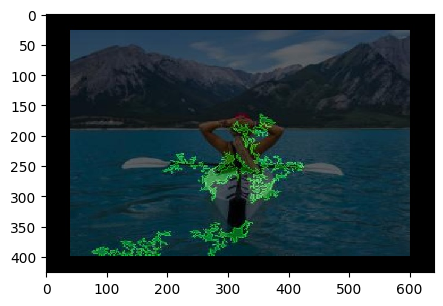

In [79]:
for explanation in response.explanations:
    attributions = dict(explanation.attributions[0].feature_attributions)
    image_ex = io.BytesIO(base64.b64decode(attributions["image"]["b64_jpeg"]))
    plt.imshow(mpimg.imread(image_ex, format="JPG"), interpolation="nearest")
    plt.show()

In [102]:
#Tabular
endpoint_tabular = gcai.Endpoint(gcai.Endpoint.list(
    filter=f'display_name={"tabu"}', 
    order_by='update_time')[-1].gca_resource.name)
print(endpoint_tabular)


resource name: projects/234652498230/locations/us-central1/endpoints/4000661018593198080


In [101]:
#It is a duplicate.. 
ENDPOINT_DISPLAY_NAME = 'tabu'

endpoint_tabular1 = gcai.Endpoint.list(
    filter=f'display_name={"tabu"}', 
    order_by='update_time')[-1].gca_resource.name
print(endpoint_tabular1)

projects/234652498230/locations/us-central1/endpoints/4000661018593198080


In [103]:
instances_tabular=[{"BMI":"16.6","Smoking":"Yes","AlcoholDrinking":"No","Stroke":"No","PhysicalHealth":"3","MentalHealth":"30","DiffWalking":"No","Sex":"Female","AgeCategory":"55-59","Race":"White","Diabetic":"Yes","PhysicalActivity":"Yes","GenHealth":"Very good","SleepTime":"5","Asthma":"Yes","KidneyDisease":"No","SkinCancer":"Yes"}]

In [104]:
tab_endpoint = gcai.Endpoint(endpoint_name)
tab_explain_response = tab_endpoint.explain(instances=instances_tabular)
print(tab_explain_response)

Prediction(predictions=[{'scores': [0.8371148705482483, 0.1628851145505905], 'classes': ['No', 'Yes']}], deployed_model_id='5747890548245528576', explanations=[attributions {
  baseline_output_value: 0.9753372073173523
  instance_output_value: 0.8371148705482483
  feature_attributions {
    struct_value {
      fields {
        key: "AgeCategory"
        value {
          number_value: 0.03596687316894531
        }
      }
      fields {
        key: "AlcoholDrinking"
        value {
          number_value: 0.0
        }
      }
      fields {
        key: "Asthma"
        value {
          number_value: -0.00927298069000244
        }
      }
      fields {
        key: "BMI"
        value {
          number_value: 4.286766052246094e-05
        }
      }
      fields {
        key: "Diabetic"
        value {
          number_value: -0.05168583393096924
        }
      }
      fields {
        key: "DiffWalking"
        value {
          number_value: 0.0
        }
      }
      fields 

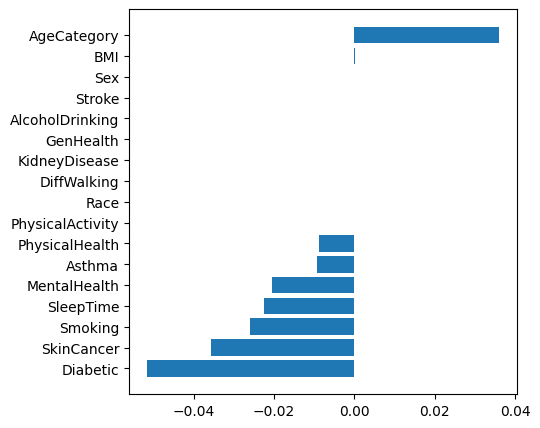

In [105]:
key_attributes = tables_explain_response.explanations[0].attributions[0].feature_attributions.items()
explanations = {key: value for key, value in sorted(key_attributes, key=lambda items: items[1])}
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [5,5]

fix, ax = plt.subplots()
ax.barh(list(explanations.keys()), list(explanations.values()))
plt.show()